In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 15s 7us/step


In [2]:
print(len(train_data))
print(len(test_data))

8982
2246


In [3]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺀다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

565248/550378 [==============================] - 4s 7us/step


In [5]:
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[0]

3

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 29ms/step - loss: 2.6293 - accuracy: 0.5065 - val_loss: 1.7889 - val_accuracy: 0.6350
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4509 - accuracy: 0.6983 - val_loss: 1.3160 - val_accuracy: 0.7190
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.0603 - accuracy: 0.7741 - val_loss: 1.1337 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8289 - accuracy: 0.8227 - val_loss: 1.0377 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6541 - accuracy: 0.8651 - val_loss: 0.9819 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5225 - accuracy: 0.8915 - val_loss: 0.9210 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4167 - accuracy: 0.9147 - val_loss: 0.8903 - val_accuracy: 0.8140
Epoch 8/20
16

In [15]:
import matplotlib.pyplot as plt

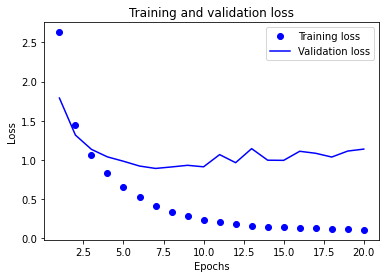

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

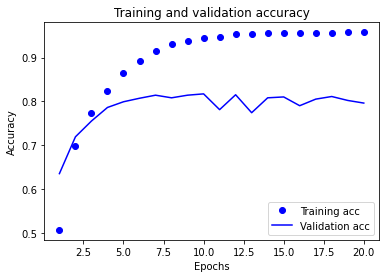

In [19]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- 위 모델은 9번째 에포크에서 과대적합이 시작되므로, 9번의 에포크로 새로운 모델을 훈련하고 평가하는 걸로 진행

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 24ms/step - loss: 2.5216 - accuracy: 0.5068 - val_loss: 1.7241 - val_accuracy: 0.5980
Epoch 2/9
16/16 [==============================] - 0s 18ms/step - loss: 1.4472 - accuracy: 0.6840 - val_loss: 1.3283 - val_accuracy: 0.7020
Epoch 3/9
16/16 [==============================] - 0s 19ms/step - loss: 1.0809 - accuracy: 0.7731 - val_loss: 1.1641 - val_accuracy: 0.7510
Epoch 4/9
16/16 [==============================] - 0s 18ms/step - loss: 0.8462 - accuracy: 0.8235 - val_loss: 1.0473 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 0s 17ms/step - loss: 0.6683 - accuracy: 0.8563 - val_loss: 0.9796 - val_accuracy: 0.8030
Epoch 6/9
16/16 [==============================] - 0s 20ms/step - loss: 0.5330 - accuracy: 0.8885 - val_loss: 0.9372 - val_accuracy: 0.8130
Epoch 7/9
16/16 [==============================] - 0s 18ms/step - loss: 0.4239 - accuracy: 0.9114 - val_loss: 0.9499 - val_accuracy: 0.7990
Epoch 8/9
16/16 [===

In [21]:
results

[0.9701293110847473, 0.7845057845115662]

In [22]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19056099732858414

In [23]:
predictions = model.predict(x_test)

In [24]:
predictions[0].shape

(46,)

In [27]:
np.sum(predictions[0])
# 각 확률의 합은 1

1.0000001

In [28]:
np.argmax(predictions[0])
# 각 확률 중 가장 높은 값을 가진 게 예측 클래스가 됨.
## 가장 확률이 높은 클래스

3

In [30]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [32]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

- 마지막 출력 차원보다 중간층 히든 유닛이 많이 적으면 안 됨. 
- 아래는 많이 적은 경우의 코드

In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 14ms/step - loss: 3.5603 - accuracy: 0.0163 - val_loss: 3.1839 - val_accuracy: 0.0240
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 2.7035 - accuracy: 0.1795 - val_loss: 2.2760 - val_accuracy: 0.2510
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 1.9090 - accuracy: 0.4635 - val_loss: 1.7361 - val_accuracy: 0.5760
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 1.5409 - accuracy: 0.5886 - val_loss: 1.5664 - val_accuracy: 0.6040
Epoch 5/20
63/63 [==============================] - 1s 13ms/step - loss: 1.3826 - accuracy: 0.6188 - val_loss: 1.5245 - val_accuracy: 0.6060
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 1.2786 - accuracy: 0.6389 - val_loss: 1.4998 - val_accuracy: 0.6310
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 1.1906 - accuracy: 0.6843 - val_loss: 1.4643 - val_accuracy: 0.6370
Epoch 8/20
63

- 아까 위에서 확인한 results는 83%까지 예측, 하지만 중간층이 너무 적어지면, 저차원 공간에 데이터를 압축하려고 하는 시도 때문에 손실이 일어남.
- 결과적으로 66% 정확도밖에 얻지 못하게 됨